In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Given variables
s2r = 0.2
s1 = np.linspace(0.000001, (1-s2r), 100)
s1i = 0.000001
a = 1.2
b = 3
kr1_max = 1
kr2_max = 1
u1 =0.1 * 10**-3
u2 = 1 * 10**-3

In [3]:
#Defining the function for fractional flow
def fractional_flow(viscosity_phase1, viscosity_phase2, rel_perm1, rel_perm2):
    ''' 
    This function calculates the fractional flow of a two-phase flow.
    
    Parameters:
    viscosity_phase1: float
        Viscosity of phase 1
    viscosity_phase2: float
        Viscosity of phase 2
    rel_perm1: float
        Relative permeability of phase 1
    rel_perm2: float
        Relative permeability of phase 2
        
    Returns:
    float
        Fractional flow
    '''
    f1 = 1/(1 + ((viscosity_phase1/viscosity_phase2) * (rel_perm2/rel_perm1)))
    return f1

In [4]:
#Defining the function for the effective saturation (Se):

def effective_saturation(saturation1, saturation1_min, residual_saturation2):
    '''
    This function calculates the effective saturation of a two-phase flow.
    
    Parameters:
    saturation1: float
        Saturation of phase 1
    saturation1_min: float
        Minimum saturation of phase 1
    residual_saturation2: float
        Residual saturation of phase 2
        
    Returns:
    float
        Effective saturation
    '''
    Se = (saturation1 - saturation1_min)/(1 - residual_saturation2 - saturation1_min)
    return Se


In [5]:
#Defining the function for relative permeability for phase 1:
def rel_perm1(rel_perm1_max, effective_saturation, a):
    '''
    This function calculates the relative permeability of phase 1.
    
    Parameters:
    rel_perm1_max: float
        Maximum relative permeability of phase 1
    effective_saturation: float
        Effective saturation
    a: float
        Exponent
        
    Returns:
    float
        Relative permeability of phase 1
    '''
    kr1 = rel_perm1_max * (effective_saturation**a)
    return kr1

In [6]:
#Defining the function for relative permeability for phase 2:
def rel_perm2(rel_perm2_max, effective_saturation, b):
    '''
    This function calculates the relative permeability of phase 2.
    
    Parameters:
    rel_perm2_max: float
        Maximum relative permeability of phase 2
    effective_saturation: float
        Effective saturation
    b: float
        Exponent
        
    Returns:
    float
        Relative permeability of phase 2
    '''
    kr2 = rel_perm2_max * ((1 - effective_saturation)**b)
    return kr2

In [7]:
#Writing the fractional flow equation in terms of effective saturation:

def f(saturation_phase1):
    '''
    This function calculates the fractional flow of a two-phase flow in terms of effective saturation.
    
    Parameters:

    effective_saturation: float
        Effective saturation
        
    Returns:
    float
        Fractional flow
    '''
    
    denominator = 1-s2r-s1i
    f1 = 1/(1 + ((u1/u2) * ((kr2_max*(1 - ((saturation_phase1 - s1i)/denominator))**b)/(kr1_max*((saturation_phase1-s1i)/denominator)**a))))
    return f1


In [8]:
#Analytical derivative function differentiation function

def central_difference_derivative(f, x, h=1e-3):
    """
    Computes the numerical derivative of function f at the point specified by 'args' with respect
    to the parameter at position 'index' using the central difference method.
    
    Parameters:
    -----------
    f : function
        The function to differentiate. It should accept the parameters in the same order as in 'args'.
    x : float
        The variable the function depends on.
    h : float, optional
        The small perturbation value used for the finite difference approximation (default is 1e-6).
        
    Returns:
    --------
    float
        The approximated derivative.
    """
        
    
    return (f(x+h) - f(x-h)) / (2 * h)

## Analytical Solution for F(s1)


In [9]:
Se = effective_saturation(s1, s1i, s2r)
kr1 = rel_perm1(kr1_max, Se, a)
kr2 = rel_perm2(kr2_max, Se, b)
f1 = f(s1)


/tmp/ipykernel_1214/2136481278.py:18: RuntimeWarning: divide by zero encountered in divide
  f1 = 1/(1 + ((u1/u2) * ((kr2_max*(1 - ((saturation_phase1 - s1i)/denominator))**b)/(kr1_max*((saturation_phase1-s1i)/denominator)**a))))


In [10]:
#Derivatives of fractional flow wrt saturation

f1_prime = central_difference_derivative(f, s1)

#Shock tangent line
shock_tangent =  f1/(s1-s1i)


/tmp/ipykernel_1214/2136481278.py:18: RuntimeWarning: invalid value encountered in power
  f1 = 1/(1 + ((u1/u2) * ((kr2_max*(1 - ((saturation_phase1 - s1i)/denominator))**b)/(kr1_max*((saturation_phase1-s1i)/denominator)**a))))
/tmp/ipykernel_1214/2270385285.py:6: RuntimeWarning: invalid value encountered in divide
  shock_tangent =  f1/(s1-s1i)


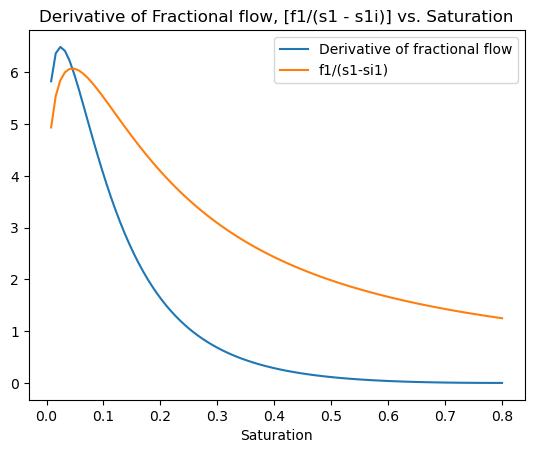

In [11]:
plt.plot(s1, f1_prime, label='Derivative of fractional flow')
plt.plot(s1, shock_tangent, label='f1/(s1-si1)')
plt.legend()
plt.title('Derivative of Fractional flow, [f1/(s1 - s1i)] vs. Saturation')
plt.xlabel('Saturation')
plt.show()


For case 1, we see our shock velocity as 6.

No intersection found within the given tolerance.


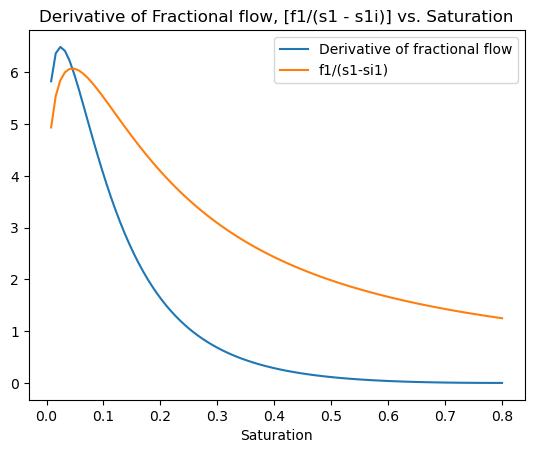

In [12]:
# Find the intersection point between the blue line and orange line
intersection_indices = np.argwhere(np.isclose(f1_prime, shock_tangent, atol=1e-1))

if intersection_indices.size > 0:
    intersection_index = intersection_indices[0]
    intersection_s1 = s1[intersection_index]
    intersection_f1_prime = f1_prime[intersection_index]
    intersection_shock_tangent = shock_tangent[intersection_index]

    print(f'Intersection point at saturation: {intersection_s1:.6f}')
    print(f'Value of derivative of fractional flow at intersection: {intersection_f1_prime:.6f}')
    print(f'Value of shock tangent line at intersection: {intersection_shock_tangent:.6f}')
else:
    print('No intersection found within the given tolerance.')

# Plotting the intersection point
plt.plot(s1, f1_prime, label='Derivative of fractional flow')
plt.plot(s1, shock_tangent, label='f1/(s1-si1)')
if intersection_indices.size > 0:
    plt.plot(intersection_s1, intersection_f1_prime, 'ro', label='Intersection Point')
plt.legend()
plt.title('Derivative of Fractional flow, [f1/(s1 - s1i)] vs. Saturation')
plt.xlabel('Saturation')
plt.show()

In [13]:
Vshock = 6

In [14]:
# Determining the shock velocity

intersection_index = np.argmin(np.abs(f1_prime - shock_tangent))
intersection_s1 = s1[intersection_index]
shock_velocity = shock_tangent[intersection_index]

print(shock_velocity)

# print(f'The shock velocity is {shock_velocity:.2f} at a saturation of {shock_saturation:.2f}')


nan


In [15]:
#Variables for plotting the saturation and dimensionless velocity curve
vd_min = f(1-s2r)
vd = f(s1)/(s1 -s1i)
v_shock = 6
vd_max = f(s1i)

/tmp/ipykernel_1214/2136481278.py:18: RuntimeWarning: divide by zero encountered in divide
  f1 = 1/(1 + ((u1/u2) * ((kr2_max*(1 - ((saturation_phase1 - s1i)/denominator))**b)/(kr1_max*((saturation_phase1-s1i)/denominator)**a))))
/tmp/ipykernel_1214/2690640660.py:3: RuntimeWarning: invalid value encountered in divide
  vd = f(s1)/(s1 -s1i)


ZeroDivisionError: float division by zero

In [ ]:
#Plotting the saturation and dimensionless velocity curve

plt.plot(s1, f1, label='Fractional flow')

## Numerical Solution